# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df= pd.merge(mouse_metadata, study_results, how= "outer", on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count= df['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse= df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df= df.loc[df["Mouse ID"]=="g989", :]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= df.loc[df['Mouse ID'].isin(duplicate_mouse)==False]
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
Mice_Clean_df= clean_df['Mouse ID'].nunique()
Mice_Clean_df


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


mean= clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median= clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var= clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std= clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem= clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats= pd.DataFrame({'Mean Tumor Volume':mean,
                             'Median Tumor Volume': median,
                              'Tumor Volume Variance':var,
                              'Tumor Volume Std. Dev.':std,
                              'Tumor Volume Std. Err.':sem})

summary_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg= clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

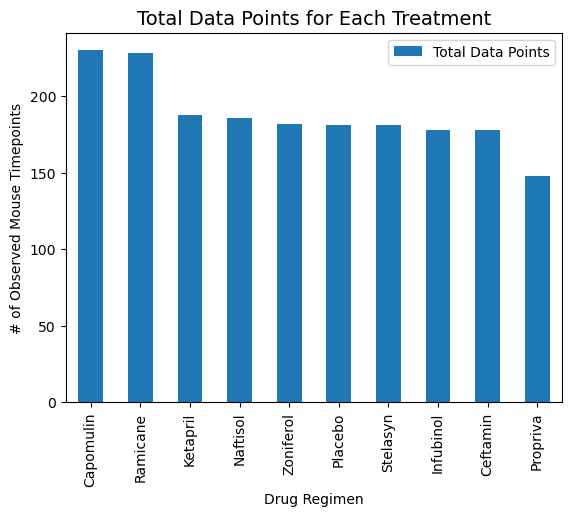

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Need to create a group series using "Drug Regimine" column and counting number of data point for each.
mice_count= clean_df['Drug Regimen'].value_counts()
total_datapoints_df = pd.DataFrame(mice_count)
total_datapoints_df.columns = ['Total Data Points']
total_datapoints_plot = total_datapoints_df.sort_values('Total Data Points', ascending = False).plot(kind='bar')
total_datapoints_plot.set_xlabel('Drug Regimen')
total_datapoints_plot.set_ylabel('# of Observed Mouse Timepoints')
plt.title('Total Data Points for Each Treatment', fontsize = 14)
plt.show()

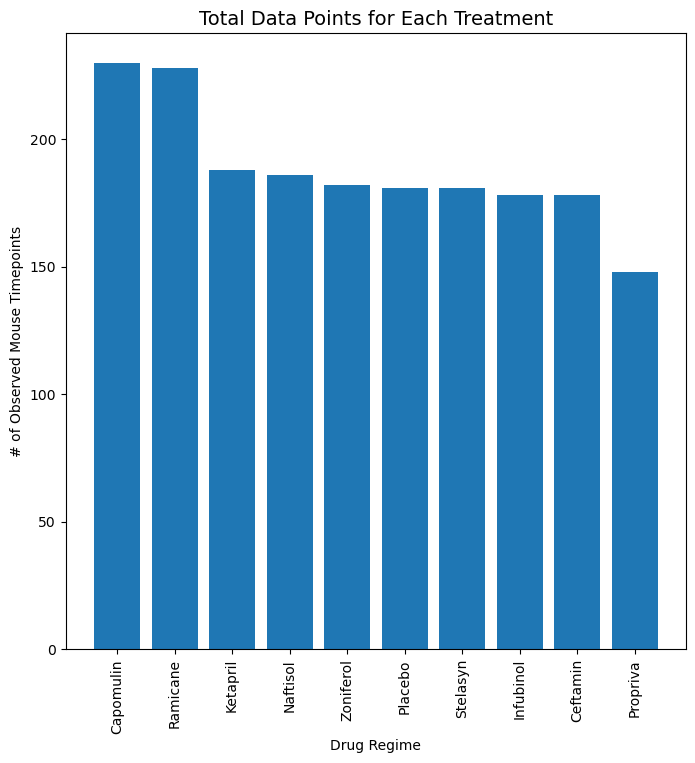

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis= mice_count.values

plt.figure(figsize=(8,8))
plt.bar(x_axis, y_axis, color='C0', align="center")
plt.xlabel('Drug Regime')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Data Points for Each Treatment', fontsize= 14)
plt.xticks(rotation="vertical")
plt.show()


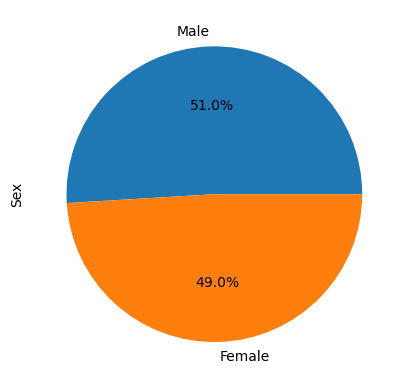

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count= clean_df['Sex'].value_counts()
gender_count.plot.pie(autopct="%1.1f%%")
plt.show()


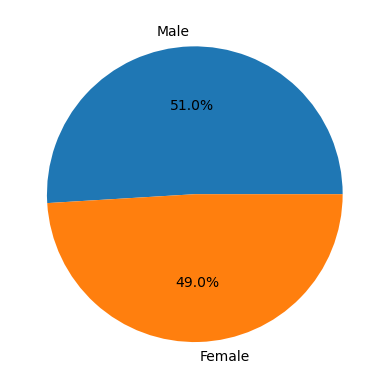

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= ['Male', 'Female']
gender_count
# 958 Male Mice, 922 Female Mice, 1,880 Toal Mice
count= [ '0.5096','0.4904']
plt.pie(count, labels=labels, autopct="%1.1f%%")
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Final_Tumor_df= clean_df.loc[(clean_df['Drug Regimen']== 'Capomulin')|(clean_df['Drug Regimen']== 'Ramicane')|(clean_df['Drug Regimen']== 'Infubinol')|(clean_df['Drug Regimen']== 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
Greatest_Time =Final_Tumor_df.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Final_merge=pd.merge(Greatest_Time,clean_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]],on=["Mouse ID","Timepoint"],how="left")
Final_merge


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

Treatments=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_Campomulin= []
Tumor_vol_Ramicane= []
Tumor_vol_Infubinol= []
Tumor_vol_Ceftamin= []

for i in range(len(Final_merge)-1):
    if Final_merge.loc[i, 'Drug Regimen']== 'Capomulin':
        Tumor_vol_Campomulin.append(Final_merge.loc[i, 'Tumor Volume (mm3)'])
    if Final_merge.loc[i, 'Drug Regimen']== 'Ramicane':
        Tumor_vol_Ramicane.append(Final_merge.loc[i, 'Tumor Volume (mm3)'])
    if Final_merge.loc[i, 'Drug Regimen']== 'Infubinol':
        Tumor_vol_Infubinol.append(Final_merge.loc[i, 'Tumor Volume (mm3)'])
    if Final_merge.loc[i, 'Drug Regimen']== 'Ceftamin':
        Tumor_vol_Ceftamin.append(Final_merge.loc[i, 'Tumor Volume (mm3)'])

Total_tumor_vol=[Tumor_vol_Campomulin, Tumor_vol_Ramicane, Tumor_vol_Infubinol, Tumor_vol_Ceftamin]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outlier_list= []
for i in range(len(Total_tumor_vol)):
    quartiles = pd.Series(Total_tumor_vol[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"For {Treatments[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes   
    # add subset     
    # Determine outliers using upper and lower bounds
    for j in range(len(Total_tumor_vol[i])):
        if (Total_tumor_vol[i][j] < lower_bound) or (Total_tumor_vol[i][j] > upper_bound):
            outlier = Total_tumor_vol[i][j]
            outlier_list.append(outlier)
            print(f"The outliers are {outlier_list}.")
 


For Capomulin:
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
For Ramicane:
The lower quartile of tumor volume is: 32.6240088275
The upper quartile of tumor volume is: 40.6611829325
The interquartile range of tumor volume is: 8.037174104999998
The the median of tumor volume is: 36.893651309999996 
Values below 20.56824767 could be outliers.
Values above 52.71694409 could be outliers.
For Infubinol:
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The outliers are [36.3213458

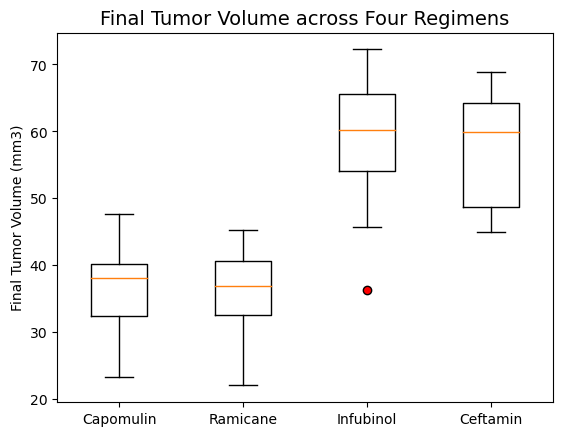

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
marker= dict(markerfacecolor= "r", marker= "o")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(Total_tumor_vol, flierprops= marker)
ax1.set_title("Final Tumor Volume across Four Regimens", fontsize = 14)
ax1.set_xticklabels(Treatments)
plt.show()

## Line and Scatter Plots

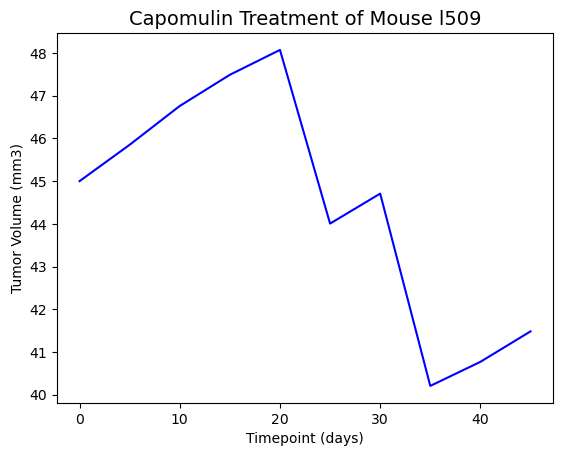

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Final_merge.loc[Final_merge['Drug Regimen']== 'Capomulin'].head

l509_tumor= clean_df.loc[clean_df['Mouse ID']=='l509']
l509_tumor

plt.plot(l509_tumor["Timepoint"],l509_tumor["Tumor Volume (mm3)"], color = "blue")
plt.title("Capomulin Treatment of Mouse l509", fontsize = 14)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

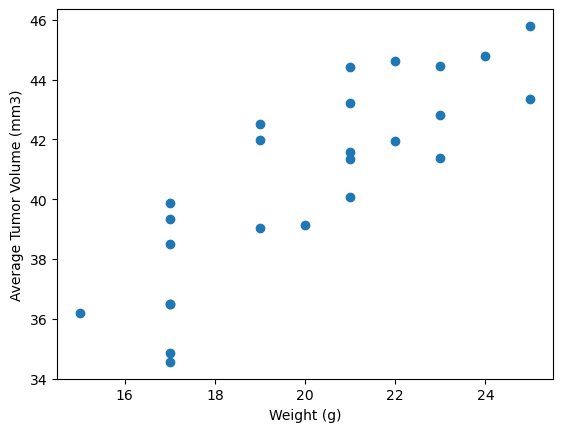

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_tumor_capomulin = capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


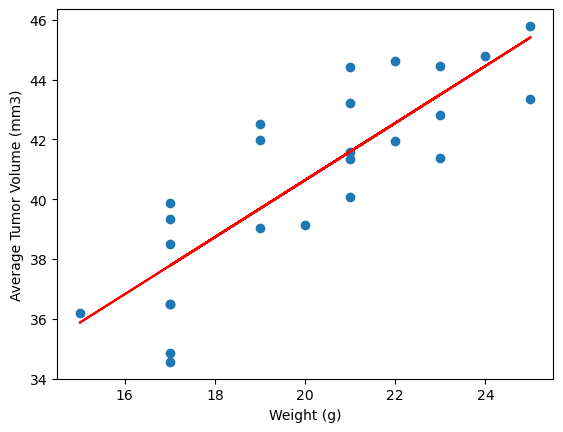

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, avg_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()
